## Module 1: Map Projections
In this lab you will learn about different map projections as well as how to display basemaps within python using the basemaps library.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

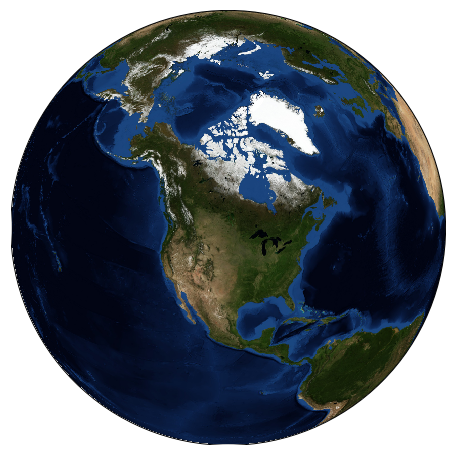

In [48]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

This globe is not only an image but is a fully functioning Matplotlib axes that understands spherical coordinates and allows easily overplot data on the map! For example, we can use a different map projection, zoom-in to North America and plot the location of Columbia, Missouri.

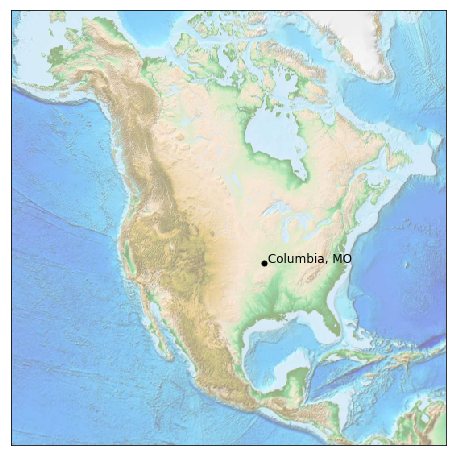

In [50]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-92.34, 38.95)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Columbia, MO', fontsize=12);

As you can see with just a few lines of python you can display a map in different orientations with data!! 

# Map Projection
A map projection is a transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. All projections distort the surface in some fashion. Different map projections exist permitting the map creator the ability to choose the projection that works best for the intended use of the map. 

Generally speaking, a map projection is any method of "flattening" a continuous curved surface onto a plane. This flattening is done for many reasons: cheap, easy to display & store, accomodate range of scales, faciliate measuring properities, etc. 

## Projection Considerations

When considering what projection to use the purpose of the map will be your guide with two main considerations to keep in mind: the projections compatibility with the data to be displayed and the preserved, compromised and approximations properties of the projection. Below we will briefly examine some of the most popular types of projections.

Before we get into the projections, here is a quick function that will be used to draw world maps along with the longitude and latitude lines for our maps.

In [52]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

## Cylindrical projections
The simplest are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively. This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles. The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles. Some cylindrical projections are The equidistant cylindrical projection (projection="cyl"), the Mercator (projection='merc') and the cylindrical equal area (projection='cea') projection.

#### Distortion
(from Wikipedia)

The classical way of showing the distortion inherent in a projection is to use Tissot's indicatrix. For a given point, using the scale factor h along the meridian, the scale factor k along the parallel, and the angle θ′ between them, Nicolas Tissot described how to construct an ellipse that characterizes the amount and orientation of the components of distortion. By spacing the ellipses regularly along the meridians and parallels, the network of indicatrices shows how distortion varies across the map.
![Tissot's Indicatrices on the Mercator projection - By Stefan Kühn - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=24628](../../resources/images/Tissot_mercator.png)

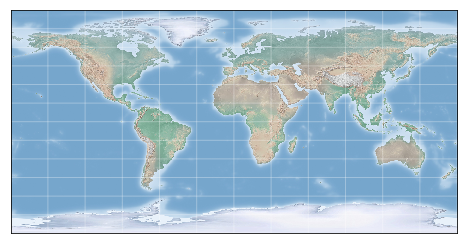

In [53]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

The additional arguments to Basemap for this view specify the latitude (lat) and longitude (lon) of the lower-left corner (llcrnr) and upper-right corner (urcrnr) for the desired map, in units of degrees.

## Pseudo-cylindrical projections
Pseudo-cylindrical projections relax the requirement that meridians (lines of constant longitude) remain vertical; this can give better properties near the poles of the projection. The Mollweide projection (projection='moll') is one common example of this, in which all meridians are elliptical arcs. It is constructed so as to preserve area across the map: though there are distortions near the poles, the area of small patches reflects the true area. Other examples of pseudo-cylindrical projections are the sinusoidal (projection='sinu') and Robinson (projection='robin') projections.

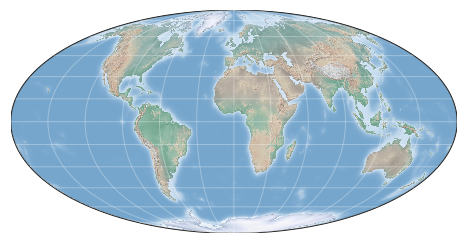

In [54]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

The extra arguments to Basemap here refer to the central latitude (lat_0) and longitude (lon_0) for the desired map.

## Perspective projections
Perspective projections are constructed using a particular choice of perspective point. An example is the orthographic projection (projection='ortho'), which shows one side of the globe. This projections can only half the globe at a time. Other perspective-based projections include the gnomonic projection (projection='gnom') and stereographic projection (projection='stere').

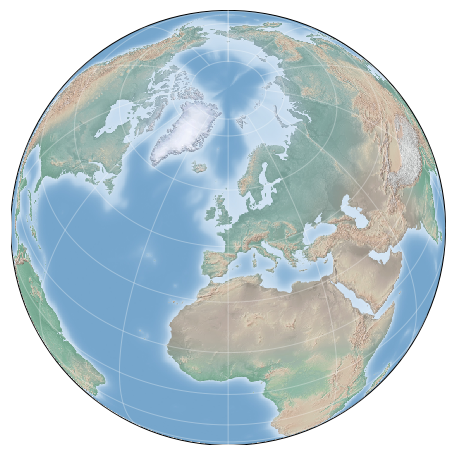

In [55]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

## Conic projections
A Conic projection projects the map onto a single cone, which is then unrolled. This can lead to very good local properties, but regions far from the focus point of the cone may become very distorted. One example of this is the Lambert Conformal Conic projection (projection='lcc'), It projects the map onto a cone arranged in such a way that two standard parallels (specified in Basemap by lat_1 and lat_2) have well-represented distances, with scale decreasing between them and increasing outside of them. Other useful conic projections are the equidistant conic projection (projection='eqdc') and the Albers equal-area projection (projection='aea'). Conic projections, like perspective projections, tend to be good choices for representing small to medium patches of the globe.

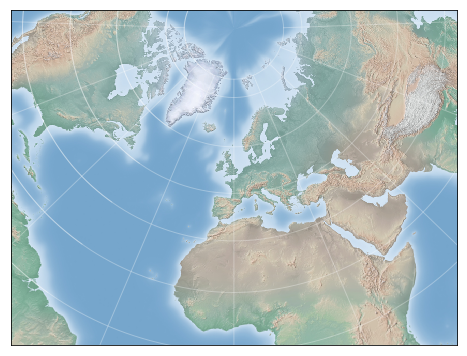

In [56]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

## Conclusion
This lab covered:
* Displaying maps within python using the basemaps library
* The most common types of map projections